In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data = [{"ar1":0.9,"interpolatedAr2":1.37,"area":36000},{"ar1":0.9,"interpolatedAr2":1.34,"area":34125},{"ar1":1.2,"interpolatedAr2":0.99,"area":12000},{"ar1":1.06,"interpolatedAr2":1.02,"area":30600},{"ar1":0.8,"interpolatedAr2":1.48,"area":18000},{"ar1":0.9,"interpolatedAr2":1.35,"area":36000},{"ar1":0.89,"interpolatedAr2":1.39,"area":32300},{"ar1":1.15,"interpolatedAr2":1.01,"area":19500},{"ar1":1.13,"interpolatedAr2":0.99,"area":25500}]
df = pd.DataFrame(data)
df['ar2'] = 1/df['interpolatedAr2']

In [2]:
df

,ar1,interpolatedAr2,area,ar2
0,0.90,1.37,36000,0.729927
1,0.90,1.34,34125,0.746269
2,1.20,0.99,12000,1.010101
3,1.06,1.02,30600,0.980392
4,0.80,1.48,18000,0.675676
5,0.90,1.35,36000,0.740741
6,0.89,1.39,32300,0.719424
7,1.15,1.01,19500,0.990099
8,1.13,0.99,25500,1.010101


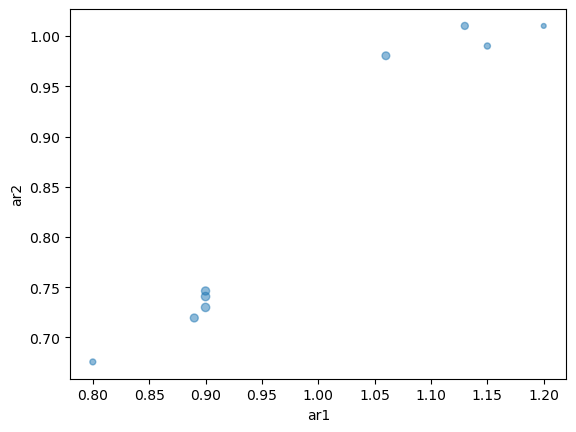

In [3]:
df.plot(kind='scatter', x='ar1', y='ar2', s=df['area']/1000, alpha=0.5)
plt.show()

In [4]:
import numpy as np

# Obtain slope and intercept of linear regression line
m, b = np.polyfit(df['ar1'], df['ar2'], 1)

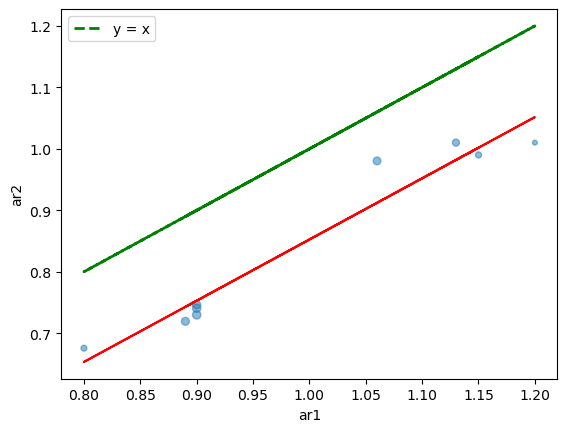

In [7]:
# Plot scatter plot
df.plot(kind='scatter', x='ar1', y='ar2', s=df['area']/1000, alpha=0.5)

# Plot linear regression line
plt.plot(df['ar1'], m*df['ar1'] + b, color='red')
# Plotting y = x line for reference
plt.plot(df['ar1'], df['ar1'], color='green', linestyle='--', linewidth=2, label='y = x')

# Displaying legend
plt.legend()

plt.show()

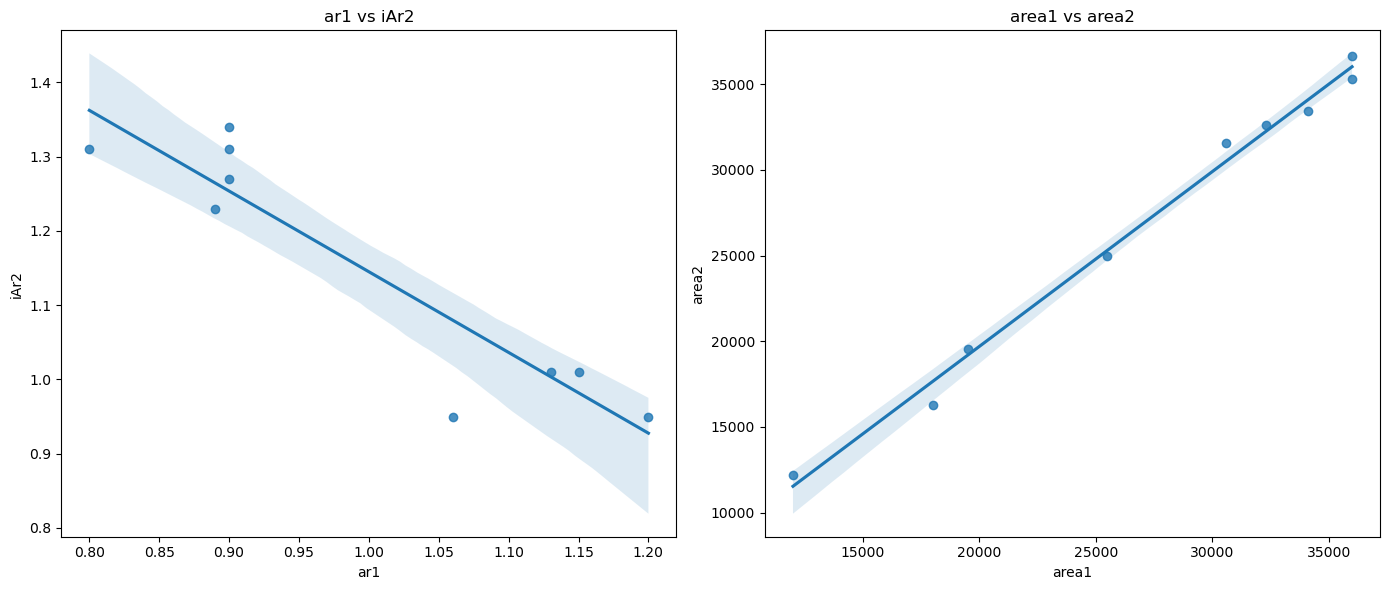

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = [{"ar1":0.9,"iAr2":1.27,"area1":36000,"area2":35280},{"ar1":0.9,"iAr2":1.34,"area1":34125,"area2":33442.5},{"ar1":1.2,"iAr2":0.95,"area1":12000,"area2":12210},{"ar1":1.06,"iAr2":0.95,"area1":30600,"area2":31594.5},{"ar1":0.8,"iAr2":1.31,"area1":18000,"area2":16290},{"ar1":0.9,"iAr2":1.31,"area1":36000,"area2":36630},{"ar1":0.89,"iAr2":1.23,"area1":32300,"area2":32623},{"ar1":1.15,"iAr2":1.01,"area1":19500,"area2":19548.75},{"ar1":1.13,"iAr2":1.01,"area1":25500,"area2":24990}]

# Extracting data for ar1 vs iAr2 plot
ar1_values = [item["ar1"] for item in data]
iAr2_values = [item["iAr2"] for item in data]

# Creating a DataFrame for ar1 vs iAr2 data
ar_df = pd.DataFrame({'ar1': ar1_values, 'iAr2': iAr2_values})

# Extracting data for area1 vs area2 plot
area1_values = [item["area1"] for item in data]
area2_values = [item["area2"] for item in data]

# Creating a DataFrame for area1 vs area2 data
area_df = pd.DataFrame({'area1': area1_values, 'area2': area2_values})

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting ar1 vs interpolatedAr2 with regression line
sns.regplot(x='ar1', y='iAr2', data=ar_df, ax=axes[0])
axes[0].set_title('ar1 vs iAr2')
axes[0].set_xlabel('ar1')
axes[0].set_ylabel('iAr2')

# Plotting area1 vs area2 with regression line
sns.regplot(x='area1', y='area2', data=area_df, ax=axes[1])
axes[1].set_title('area1 vs area2')
axes[1].set_xlabel('area1')
axes[1].set_ylabel('area2')

plt.tight_layout()
plt.show()


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [1]:
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = [{"ar1":0.9,"iAr2":1.27,"area1":36000,"area2":35280},{"ar1":0.9,"iAr2":1.34,"area1":34125,"area2":33442.5},{"ar1":1.2,"iAr2":0.95,"area1":12000,"area2":12210},{"ar1":1.06,"iAr2":0.95,"area1":30600,"area2":31594.5},{"ar1":0.8,"iAr2":1.31,"area1":18000,"area2":16290},{"ar1":0.9,"iAr2":1.31,"area1":36000,"area2":36630},{"ar1":0.89,"iAr2":1.23,"area1":32300,"area2":32623},{"ar1":1.15,"iAr2":1.01,"area1":19500,"area2":19548.75},{"ar1":1.13,"iAr2":1.01,"area1":25500,"area2":24990}]

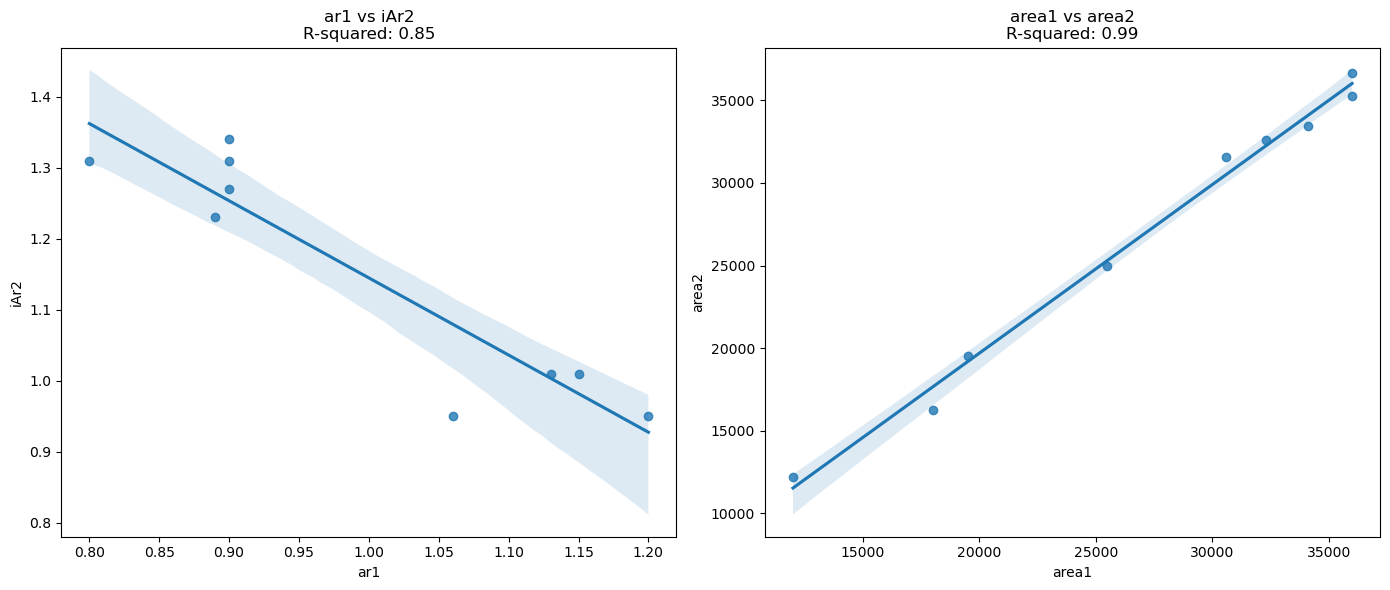

ar1 vs iAr2 Regression Coefficients:
const    2.231244
ar1     -1.086361
dtype: float64

area1 vs area2 Regression Coefficients:
const   -702.094137
area1      1.020091
dtype: float64


In [3]:
ar_df = pd.DataFrame({
    'ar1': [item["ar1"] for item in data],
    'iAr2': [item["iAr2"] for item in data]
})

area_df = pd.DataFrame({
    'area1': [item["area1"] for item in data],
    'area2': [item["area2"] for item in data]
})

# Creating subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotting ar1 vs iAr2 with regression line and statistics
X_ar = sm.add_constant(ar_df['ar1'])
model_ar = sm.OLS(ar_df['iAr2'], X_ar).fit()
sns.regplot(x='ar1', y='iAr2', data=ar_df, ax=axes[0])
axes[0].set_title('ar1 vs iAr2\nR-squared: {:.2f}'.format(model_ar.rsquared))

# Plotting area1 vs area2 with regression line and statistics
X_area = sm.add_constant(area_df['area1'])
model_area = sm.OLS(area_df['area2'], X_area).fit()
sns.regplot(x='area1', y='area2', data=area_df, ax=axes[1])
axes[1].set_title('area1 vs area2\nR-squared: {:.2f}'.format(model_area.rsquared))

plt.tight_layout()
plt.show()

# Print regression coefficients
print("ar1 vs iAr2 Regression Coefficients:")
print(model_ar.params)

print("\narea1 vs area2 Regression Coefficients:")
print(model_area.params)


In [8]:
import numpy as np
import statsmodels.api as sm

# Assuming 'X' is your independent variable(s) and 'y' is your dependent variable
X = area_df['area1']
y = area_df['area2']

# Add a constant to the independent variable matrix for the intercept term
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the predicted values
predicted_values = model.predict(X)

# Calculate residuals
residuals = y - predicted_values

# Calculate mean squared error (MSE)
mse = np.mean(residuals**2)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

print("RMSE:", rmse)


RMSE: 762.5072363762798
